<a href="https://colab.research.google.com/github/Pysrdafoice/Recomenda-o-de-produtos-KNN/blob/main/recomenda%C3%A7%C3%A3o_ecommece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Para criar um sistema de recomendação utilizando o Opencv, vamos criar uma similaridade de imagem

In [1]:
!pip install pillow

##Teste 1


In [ ]:
import os
import cv2 as cv
import requests
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import keras.applications.resnet50 as resnet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from sklearn.neighbors import NearestNeighbors
from PIL import Image

# Configurando o modelo ResNet50
model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False
model_sequential = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

model_sequential.summary()

# Função para extrair características da imagem
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / np.linalg.norm(result)
    return normalized_result

# Função para carregar os dados do diretório
def get_data(data_dir, model):
    class_data = {}
    image_paths = {}

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            class_data[class_name] = []
            image_paths[class_name] = []
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                features = extract_features(img_path, model)
                class_data[class_name].append(features)
                image_paths[class_name].append(img_path)

    return class_data, image_paths

# Função para recomendar produtos
def recommend_products(image_path, class_data, image_paths, model, num_recommendations=5):
    input_features = extract_features(image_path, model)
    distances = []
    indices = []
    all_image_paths = []

    for class_name, class_features in class_data.items():
        for i, feature in enumerate(class_features):
            distance = np.linalg.norm(input_features - feature)
            distances.append(distance)
            indices.append((class_name, i))
            all_image_paths.append(image_paths[class_name][i])

    nearest_indices = np.argsort(distances)[:num_recommendations]
    recommended_classes = [indices[i][0] for i in nearest_indices]
    recommended_images = [all_image_paths[i] for i in nearest_indices]

    return {"class": recommended_classes[0], "recommended_images": recommended_images}

# Diretório base contendo as classes
base_dir = "/content/ecommerce products"

# Carregar os dados
class_data, image_paths = get_data(base_dir, model_sequential)

# Configuração do modelo KNN
neighbors_model = {}
for class_name, features in class_data.items():
    knn = NearestNeighbors(n_neighbors=10, algorithm="brute", metric="euclidean")
    knn.fit(features)
    neighbors_model[class_name] = knn

# Selecionar a imagem
new_image_path = "/content/ecommerce products/tshirt/146.jpg"

# Obter recomendações
recommendation_products = recommend_products(new_image_path, class_data, image_paths, model_sequential)

if recommendation_products:
    print(f"Classe detectada: {recommendation_products['class']}")
    print("Produtos recomendados:")

    # Exibir imagens recomendadas lado a lado
    fig, axes = plt.subplots(1, len(recommendation_products["recommended_images"]), figsize=(15, 5))
    for i, image_path in enumerate(recommendation_products["recommended_images"]):
        try:
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
        except Exception as e:
            print(f"Erro ao exibir a imagem {image_path}: {e}")
            axes[i].text(0.5, 0.5, "Erro ao carregar imagem", ha='center', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma recomendação encontrada.")


Teste 2


In [2]:
#importar as imagens do arquivo
import os
import cv2 as cv
import requests
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import keras.applications.resnet50 as resnet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from sklearn.neighbors import NearestNeighbors
from PIL import Image



In [4]:
#Configurando o modelo Resnet50
model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False
sequential_model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
sequential_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
# Função para extrair características da imagem
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / np.linalg.norm(result)
    return normalized_result

In [10]:
#Função para obeter os dados de todas as classes dinamicamente

def get_data(data_dir, model):
    class_data = {}
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            class_data[class_name] = []
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                features = extract_features(img_path, model)
                class_data[class_name].append((img_path, features))
    return class_data


In [11]:
#Função para recomendar produtos por categoria

def recommend_products(image_path, class_data, model, num_recommendations=1):
    input_features = extract_features(image_path, model)
    recommendations = {}
    for class_name, class_features in class_data.items():
        distances = []
        for img_path, feature in class_features:
            distance = np.linalg.norm(input_features - feature)
            distances.append((img_path, distance))

        # Ordenar por distância e pegar os mais próximos

        distances.sort(key=lambda x: x[1])
        recommendations[class_name] = [img_path for img_path, _ in distances[:num_recommendations]]
    return recommendations



In [8]:
#Importando os dados de ecommerce_keggle
!kaggle datasets download -d sunnykusawa/ecommerce-products-image-dataset

!unzip ecommerce-products-image-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/sunnykusawa/ecommerce-products-image-dataset
License(s): CC0-1.0
 89% 36.0M/40.4M [00:00<00:00, 74.4MB/s]
100% 40.4M/40.4M [00:00<00:00, 76.3MB/s]
Archive:  ecommerce-products-image-dataset.zip
  inflating: ecommerce products/jeans/1.jpg  
  inflating: ecommerce products/jeans/10.jpg  
  inflating: ecommerce products/jeans/100.jpg  
  inflating: ecommerce products/jeans/101.jpg  
  inflating: ecommerce products/jeans/102.jpg  
  inflating: ecommerce products/jeans/103.jpg  
  inflating: ecommerce products/jeans/104.jpg  
  inflating: ecommerce products/jeans/105.jpg  
  inflating: ecommerce products/jeans/106.jpg  
  inflating: ecommerce products/jeans/107.jpg  
  inflating: ecommerce products/jeans/108.jpg  
  inflating: ecommerce products/jeans/109.jpg  
  inflating: ecommerce products/jeans/11.jpg  
  inflating: ecommerce products/jeans/110.jpg  
  inflating: ecommerce products/jeans/111.jpg  
  inflating: ecommerce products/jeans/112.jpg

In [12]:
#Avaliação de K nearest Neighbors

# Diretório base contendo as categorias
base_dir = "/content/ecommerce products"
class_data = get_data(base_dir, sequential_model)

# Selecionar a imagem de entrada
new_image_path = "/content/ecommerce products/tshirt/146.jpg"
recommendations = recommend_products(new_image_path, class_data, sequential_model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Produtos recomendados por categoria:


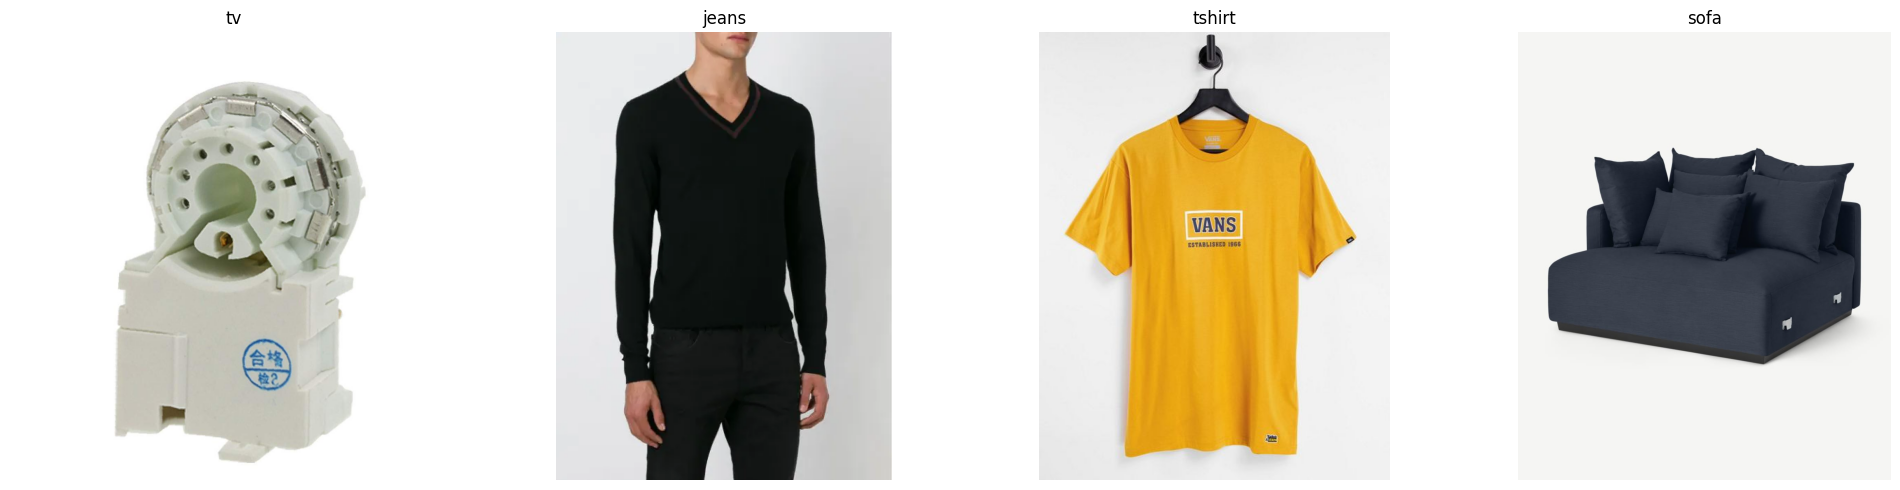

In [17]:

# Exibir as recomendações
if recommendations:
    print("Produtos recomendados por categoria:")
    fig, axes = plt.subplots(1, len(recommendations), figsize=(20, 5))
    for i, (class_name, img_paths) in enumerate(recommendations.items()):
        try:
            img = mpimg.imread(img_paths[0])  # Pega a primeira recomendação da categoria
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(class_name)
        except Exception as e:
            print(f"Erro ao exibir a imagem {img_paths[0]}: {e}")
            axes[i].text(0.5, 0.5, "Erro ao carregar imagem", ha='center', va='center')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma recomendação encontrada.")